# 1. Business Understanding

## 1.1 Introduction

This project aims to classify sentiments in tweets mentioning Apple and Google products into three categories: positive, neutral, or negative. Sentiment analysis is a key application of natural language processing (NLP) that helps organizations understand public opinion at scale.


## 1.2 Problem Statement

Apple and Google depend heavily on the perception of their customers towards their products. As customers continue to give feedback on platforms such as Twitter(X), it is important to understand the sentiment of their feedback. This has lead to the development of models that can help classify these tweets.

## 1.3 Objectives

### 1.3.1 Main Objective

Build an accurate and efficient natural language processing model to classify tweets mentioning Apple and Google products into three sentiment categories: `positive`, `neutral` and `negative`.

### 1.3.2 Specific objectives

- To explore and analyze the tweet data and provide actionable insights

- To preprocess the data using Natural Language Processing techniques.

- To evaluate classifier performance using appropriate metrics



# 2. Data Understanding

In [5]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


## 2.1 Initial Data Loading and Inspection

In [7]:
judge = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

judge.head(20)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [8]:
basic_info = {
    "Shape": judge.shape,
    "Columns": list(judge.columns),
    "Missing Values": judge.isnull().sum(),
    "Duplicate Rows": judge.duplicated().sum()
}


# Sentiment label overview

sentiment_counts = judge["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

# Brand/product mentions overview
brand_counts = judge["emotion_in_tweet_is_directed_at"].value_counts(dropna=False)

# Sample tweets from each sentiment

sample_tweets = (
    judge.groupby("is_there_an_emotion_directed_at_a_brand_or_product")["tweet_text"]
    .apply(lambda x: x.sample(1, random_state=42))
)

basic_info, sentiment_counts, brand_counts.head(10), sample_tweets

({'Shape': (9093, 3),
  'Columns': ['tweet_text',
   'emotion_in_tweet_is_directed_at',
   'is_there_an_emotion_directed_at_a_brand_or_product'],
  'Missing Values': tweet_text                                               1
  emotion_in_tweet_is_directed_at                       5802
  is_there_an_emotion_directed_at_a_brand_or_product       0
  dtype: int64,
  'Duplicate Rows': 22},
 is_there_an_emotion_directed_at_a_brand_or_product
 No emotion toward brand or product    5389
 Positive emotion                      2978
 Negative emotion                       570
 I can't tell                           156
 Name: count, dtype: int64,
 emotion_in_tweet_is_directed_at
 NaN                                5802
 iPad                                946
 Apple                               661
 iPad or iPhone App                  470
 Google                              430
 iPhone                              297
 Other Google product or service     293
 Android App                        

In [9]:
judge_clean = judge.drop_duplicates()
judge_clean = judge_clean.dropna(subset=["tweet_text"]).reset_index(drop=True)


sentiment_map = {
    "Positive emotion": "Positive",
    "Negative emotion": "Negative",
    "No emotion toward brand or product": "Neutral",
    "I can't tell": "Neutral"
}


judge_clean["sentiment"] = judge_clean["is_there_an_emotion_directed_at_a_brand_or_product"].map(sentiment_map)
judge_clean["brand"] = judge_clean["emotion_in_tweet_is_directed_at"].fillna("Unknown")

def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()   


judge_clean["clean_text"] = judge_clean["tweet_text"].apply(clean_tweet)



data_overview = {
    "Shape after cleaning": judge_clean.shape,
    "Sentiment distribution": judge_clean["sentiment"].value_counts(),
    "Brand distribution": judge_clean["brand"].value_counts().head(10),
    "Nulls check": judge_clean.isnull().sum()
}


judge_clean.head(), data_overview



(                                          tweet_text  \
 0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
 1  @jessedee Know about @fludapp ? Awesome iPad/i...   
 2  @swonderlin Can not wait for #iPad 2 also. The...   
 3  @sxsw I hope this year's festival isn't as cra...   
 4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
 
   emotion_in_tweet_is_directed_at  \
 0                          iPhone   
 1              iPad or iPhone App   
 2                            iPad   
 3              iPad or iPhone App   
 4                          Google   
 
   is_there_an_emotion_directed_at_a_brand_or_product sentiment  \
 0                                   Negative emotion  Negative   
 1                                   Positive emotion  Positive   
 2                                   Positive emotion  Positive   
 3                                   Negative emotion  Negative   
 4                                   Positive emotion  Positive   
 
                 brand

In [10]:
judge_clean.head(20)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,sentiment,brand,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Negative,iPhone,i have a 3g iphone after 3 hrs tweeting at ris...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Positive,iPad or iPhone App,know about awesome ipadiphone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Positive,iPad,can not wait for ipad 2 also they should sale ...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Negative,iPad or iPhone App,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Positive,Google,great stuff on fri sxsw marissa mayer google t...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,Neutral,Unknown,new ipad apps for speechtherapy and communicat...
6,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,Positive,Android,sxsw is just starting ctia is around the corne...
7,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Positive,iPad or iPhone App,beautifully smart and simple idea rt wrote abo...
8,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Positive,Apple,counting down the days to sxsw plus strong can...
9,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,Positive,Android,excited to meet the at sxsw so i can show them...


C:\Users\User\AppData\Local\Temp\ipykernel_3132\3822288061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


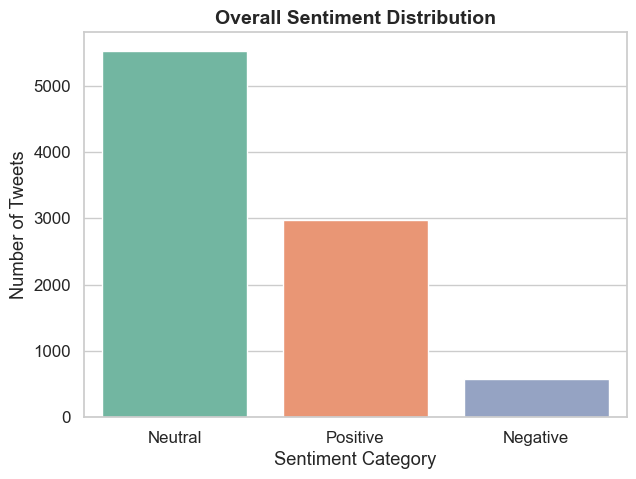

In [11]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Sentiment distribution

plt.figure(figsize=(7,5))
sns.countplot(
    data=judge_clean,
    x="sentiment",
    order=judge_clean["sentiment"].value_counts().index,
    palette="Set2"
)

plt.title("Overall Sentiment Distribution", fontsize=14, weight="bold")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Tweets")
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_3132\415309230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x="count", y="brand", palette="viridis")


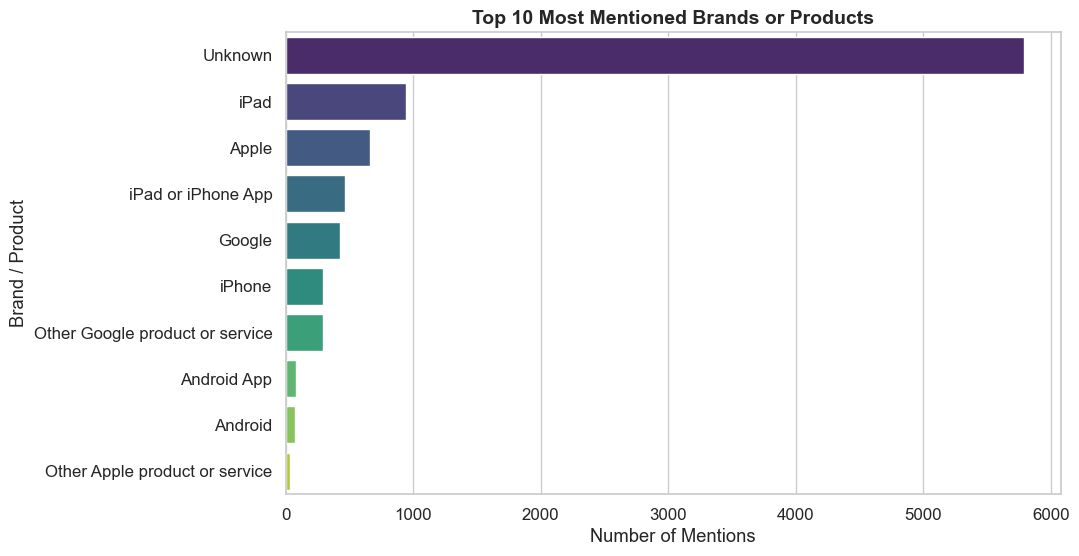

In [12]:
# top 10 brands or products mentioned

top_brands = (
    judge_clean["brand"]
    .value_counts()
    .reset_index()
)
top_brands.columns = ["brand", "count"]  
top_brands = top_brands.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_brands, x="count", y="brand", palette="viridis")
plt.title("Top 10 Most Mentioned Brands or Products", fontsize=14, weight="bold")
plt.xlabel("Number of Mentions")
plt.ylabel("Brand / Product")
plt.show()


In [13]:
def assign_brand_group(brand_name):
    brand_name = str(brand_name).lower()
    
    # ensure apple gets all iPad/iPhone app mentions
    if any(word in brand_name for word in ["apple", "ipad", "iphone", "ios", "itunes"]):
        return "Apple"
    elif any(word in brand_name for word in ["google", "android", "nexus", "pixel", "gmail", "maps"]):
        return "Google"
    else:
        return "Other/Unknown"

judge_clean["brand_group"] = judge_clean["brand"].apply(assign_brand_group)



judge_clean[["brand", "brand_group"]].head(10)



,brand,brand_group
0,iPhone,Apple
1,iPad or iPhone App,Apple
2,iPad,Apple
3,iPad or iPhone App,Apple
4,Google,Google
5,Unknown,Other/Unknown
6,Android,Google
7,iPad or iPhone App,Apple
8,Apple,Apple
9,Android,Google


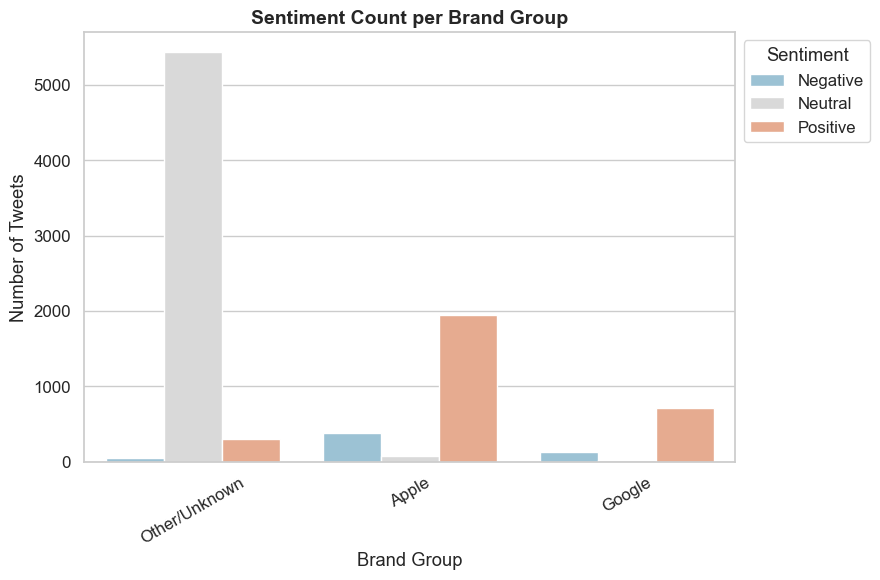

In [14]:
sentiment_counts = (
    judge_clean.groupby(["brand_group", "sentiment"])
    .size()
    .reset_index(name="count")
)


brand_order = (
    sentiment_counts.groupby("brand_group")["count"]
    .sum()
    .sort_values(ascending=False)
    .index
)


plt.figure(figsize=(9,6))
sns.barplot(
    data=sentiment_counts,
    x="brand_group",
    y="count",
    hue="sentiment",
    order=brand_order,
    palette={"Positive": "#f4a582", "Neutral": "#d9d9d9", "Negative": "#92c5de"}
)


plt.title("Sentiment Count per Brand Group", fontsize=14, weight="bold")
plt.xlabel("Brand Group")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=30)
plt.legend(title="Sentiment", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [16]:


nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|@\w+|#", "", str(text))  
    text = re.sub(r"[^a-zA-Z\s]", "", text)  
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


judge_clean["processed_text"] = judge_clean["clean_text"].apply(preprocess_text)


tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(judge_clean["processed_text"])
y = judge_clean["sentiment"]


X_tfidf.shape, len(tfidf.get_feature_names_out()), y.value_counts()



[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


((9070, 3000),
 3000,
 sentiment
 Neutral     5531
 Positive    2970
 Negative     569
 Name: count, dtype: int64)

In [17]:
# split data into Train/Test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", x_train.shape)
print("Test set:", x_test.shape)

Train set: (7256, 3000)
Test set: (1814, 3000)


In [18]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)


print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       0.58      0.06      0.11       114
     Neutral       0.70      0.88      0.78      1106
    Positive       0.64      0.45      0.52       594

    accuracy                           0.69      1814
   macro avg       0.64      0.46      0.47      1814
weighted avg       0.67      0.69      0.65      1814



In [19]:
svm_model = LinearSVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)



print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

    Negative       0.54      0.25      0.35       114
     Neutral       0.72      0.81      0.77      1106
    Positive       0.59      0.52      0.55       594

    accuracy                           0.68      1814
   macro avg       0.62      0.53      0.55      1814
weighted avg       0.67      0.68      0.67      1814



In [20]:
# Model Improvement

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


svm_balanced = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_balanced.fit(x_train, y_train)


y_pred_balanced = svm_balanced.predict(x_test)

print(" SVM Balanced")
print(classification_report(y_test, y_pred_balanced))
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))




 SVM Balanced
              precision    recall  f1-score   support

    Negative       0.28      0.54      0.37       114
     Neutral       0.77      0.66      0.71      1106
    Positive       0.55      0.60      0.57       594

    accuracy                           0.64      1814
   macro avg       0.54      0.60      0.55      1814
weighted avg       0.67      0.64      0.65      1814

Accuracy: 0.6350606394707828


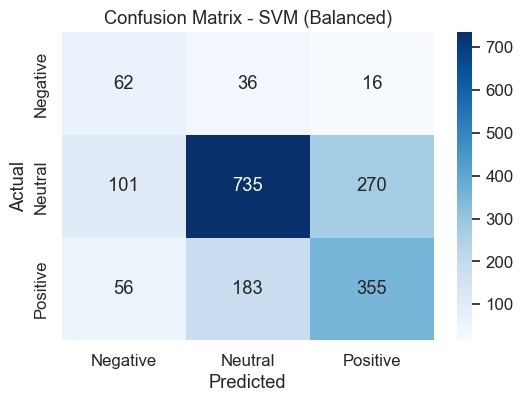

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_balanced, labels=['Negative', 'Neutral', 'Positive'])


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Balanced)')
plt.show()





In [22]:
from sklearn.svm import LinearSVC

tfidf_tuned = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.8,
    stop_words='english'
)

In [23]:
x_tfidf_tuned = tfidf_tuned.fit_transform(judge_clean["clean_text"])
y = judge_clean["sentiment"]

# Split again

x_train, x_test, y_train, y_test = train_test_split(x_tfidf_tuned, y, test_size=0.2, random_state=42)

svm_balanced_tuned = LinearSVC(class_weight='balanced', random_state=42)
svm_balanced_tuned.fit(x_train, y_train)


y_pred_tuned = svm_balanced_tuned.predict(x_test)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

    Negative       0.37      0.45      0.41       119
     Neutral       0.78      0.73      0.75      1139
    Positive       0.54      0.57      0.55       556

    accuracy                           0.67      1814
   macro avg       0.56      0.59      0.57      1814
weighted avg       0.68      0.67      0.67      1814



C:\Users\User\AppData\Local\Temp\ipykernel_3132\1058076328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=judge_clean, x="sentiment", order=judge_clean["sentiment"].value_counts().index, palette="viridis")


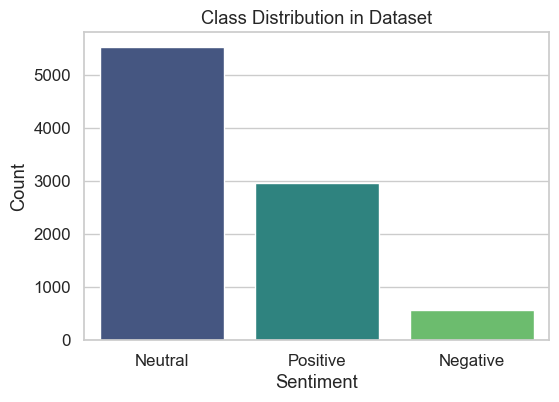

In [24]:
#Data Balance

plt.figure(figsize=(6,4))
sns.countplot(data=judge_clean, x="sentiment", order=judge_clean["sentiment"].value_counts().index, palette="viridis")
plt.title("Class Distribution in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [25]:
# fixing the bias model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# vectorize

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2
)

X = vectorizer.fit_transform(judge_clean['clean_text'])
y = judge_clean['sentiment']


# oversample to balance classes
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

# train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# train the improved svm
svm_balanced_ngram = LinearSVC(class_weight='balanced', random_state=42)
svm_balanced_ngram.fit(X_train, y_train)

# evaluation
y_pred_ngram = svm_balanced_ngram.predict(X_test)
print(classification_report(y_test, y_pred_ngram))


              precision    recall  f1-score   support

    Negative       0.90      0.99      0.94      1106
     Neutral       0.78      0.69      0.73      1106
    Positive       0.78      0.79      0.78      1107

    accuracy                           0.82      3319
   macro avg       0.82      0.82      0.82      3319
weighted avg       0.82      0.82      0.82      3319



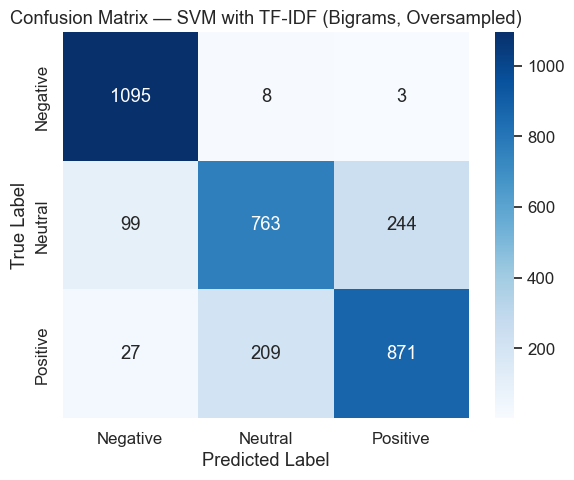

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_ngram, labels=svm_balanced_ngram.classes_)


plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=svm_balanced_ngram.classes_,
    yticklabels=svm_balanced_ngram.classes_
)
plt.title("Confusion Matrix — SVM with TF-IDF (Bigrams, Oversampled)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stopwords = [
    'sxsw', 'google', 'apple', 'ipad', 'iphone', 'android', 'app',
    'store', 'rt', 'link', 'austin', 'new', 'http', 'https', 'mention'
]


all_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stopwords))

top_n = 10

for sentiment in judge_clean['sentiment'].unique():
    subset = judge_clean[judge_clean['sentiment'] == sentiment]
    
    vectorizer = TfidfVectorizer(
        max_features=5000,
        stop_words=all_stopwords, 
        ngram_range=(1, 2),      
        min_df=2                  
    )
    
    tfidf_matrix = vectorizer.fit_transform(subset['clean_text'])
    
    mean_scores = tfidf_matrix.mean(axis=0).A1
    words = vectorizer.get_feature_names_out()
    
    top_indices = mean_scores.argsort()[::-1][:top_n]
    top_words = [words[i] for i in top_indices]
    
    print(f"\nTop words for '{sentiment}' sentiment:")
    print(top_words)







Top words for 'Negative' sentiment:
['just', 'like', 'people', 'apps', 'circles', 'design', 'social', 'battery', 'im', 'time']

Top words for 'Positive' sentiment:
['popup', 'ipad2', 'just', 'launch', 'line', 'amp', 'great', 'party', 'time', 'circles']

Top words for 'Neutral' sentiment:
['circles', 'launch', 'social', 'popup', 'amp', 'today', 'network', 'social network', 'line', 'called']


In [28]:
# people complain about usability and features
# people praise product launches
# people report events neutrality

In [29]:
import joblib

# Load the exact pair trained together
vectorizer = joblib.load("tfidf_vectorizer.pkl")
svm_model = joblib.load("sentiment_svm_balanced_model.pkl")

print("Vectorizer features:", len(vectorizer.get_feature_names_out()))
print("Model expects:", svm_model.n_features_in_)


Vectorizer features: 3000
Model expects: 3000


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.7.2 when using version 1.5.1. This might lead to breaking code or in

In [30]:
def predict_sentiment(text):
    processed = preprocess_text(text)
    vec = vectorizer.transform([processed])
    prediction = svm_model.predict(vec)
    return prediction[0]


test_tweets = [
    "Just updated my iPhone -  love new camera features!",
    "Google Assistant understand me perfectly this time. Impressed",
    "The new MacBook battery life is unbelievable. Great job, Apple!",
    "Android 15 feels super smooth. Finally some solid updates!",

    "Waiting for Apple's event next week, let's see what they announce",
    "Reading tech reviews on the new Pixel - looks interesting.",
    "Installed the latest iOS update this morning, no issues so far.",

    "My iPhone keeps overheating after the update. Totally annoying",
    "Google Drive crashed again while uploading my flies.",
    "Still can't connect to Wifi on my MacBook - what's wrong with this"
   
   

]

for tweet in test_tweets:
    print(f"{tweet} Sentiment: {predict_sentiment(tweet)}")


Just updated my iPhone -  love new camera features! Sentiment: Negative
Google Assistant understand me perfectly this time. Impressed Sentiment: Negative
The new MacBook battery life is unbelievable. Great job, Apple! Sentiment: Positive
Android 15 feels super smooth. Finally some solid updates! Sentiment: Negative
Waiting for Apple's event next week, let's see what they announce Sentiment: Neutral
Reading tech reviews on the new Pixel - looks interesting. Sentiment: Neutral
Installed the latest iOS update this morning, no issues so far. Sentiment: Negative
My iPhone keeps overheating after the update. Totally annoying Sentiment: Neutral
Google Drive crashed again while uploading my flies. Sentiment: Negative
Still can't connect to Wifi on my MacBook - what's wrong with this Sentiment: Negative


In [31]:
import torch
from transformers import pipeline

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    framework="pt"
)

for tweet in test_tweets:
    result = sentiment_analyzer(tweet)[0]
    print(f"{tweet}  {result['label']} ({result['score']:.2f})")


test_tweets = [

    "Iphone 4 really works slow",
    "Just updated my iPhone -  love new camera features!",
    "Google Assistant understand me perfectly this time. Impressed",
    "The new MacBook battery life is unbelievable. Great job, Apple!",
    "Android 15 feels super smooth. Finally some solid updates!",

    "Waiting for Apple's event next week, let's see what they announce",
    "Reading tech reviews on the new Pixel - looks interesting.",
    "Installed the latest iOS update this morning, no issues so far.",

    "NVDIA will be making tiny home-devices",
    "repair my mac charger or buy a new one",

    "My iPhone keeps overheating after the update. Totally annoying",
    "Google Drive crashed again while uploading my flies.",
    "Still can't connect to Wifi on my MacBook - what's wrong with this"

]

for tweet in test_tweets:
    result = sentiment_analyzer(tweet)[0]
    print(f"{tweet}  {result['label']} ({result['score']:.2f})")



ModuleNotFoundError: No module named 'transformers'

In [ ]:
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

for tweet in test_tweets:
    result = sentiment_analyzer(tweet)[0]
    label = label_map[result["label"]]
    print(f"{tweet}  {label} ({result['score']:.2f})")


In [ ]:
# checking the information of the dataset
df.info()

- The `tweet` column has only one null row. We will drop this row later on.

- The `directed_at` column has alot of missing values.

In [ ]:
# checking the descriptive statistics of the dataset
df.describe()

In [ ]:
# checking the shae of the dataset
df.shape

## 2.2 Data Cleaning

In this section we will:
- Handle missing values
- Check for duplicates


In [ ]:
# checking the missing values
df.isnull().sum() 

In [ ]:
# filling in the null values in directed_at with unknown
df['directed_at'].fillna('Unknown', inplace=True)

# dropping the null value in the tweet column
df.dropna(subset=['tweet'], inplace=True, axis=0)

In [ ]:
df.isnull().sum()

In [ ]:
# checking for duplicate values

df.duplicated().sum()

In [ ]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

# checking if duplicates were dropped
df.duplicated().sum()

In [ ]:
df['sentiment'].value_counts()

In [ ]:
# replacing the sentiment values with more descriptive ones
df['sentiment'] = df['sentiment'].replace({
    'No emotion toward brand or product' : 'Neutral emotion',
    "I can't tell" : "Neutral emotion"
})

df['sentiment'].value_counts()

## 2.4 Exploratory Data Analysis

In this section we will:

- Check the distribution of the target variable(sentiment) within the dataset

- Check the distribution of tweets across Apple and Google products.

- Investigate how sentiment (positive, negative, neutral) is distributed across Tweets about Apple and Google products.




### Distribution of Target Variable

In [ ]:
sentiment_perc = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_perc.round(3))

### Distribution of Tweets across Apple and Google products

In [ ]:
directed_at_perc = df['directed_at'].value_counts(normalize=True) * 100
print(directed_at_perc.round(3))

### Distribution of Sentiment across tweets about Apple and Google products

In [ ]:
sentiment_counts = df.groupby(['directed_at', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
company_mapping = {
    'iPhone': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPad': 'Apple',
    'Apple': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Android': 'Google',
    'Android App': 'Google',
    'Other Google product or service': 'Google'
}

df['Company'] = df['directed_at'].map(company_mapping).fillna('Unknown')
df.sample()

In [ ]:
sentiment_counts_company = df.groupby(['Company', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts_company.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution')
plt.show()